# Assignment2.Exercise6: Forward selection

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
%matplotlib inline

In [266]:
data = np.loadtxt('GPUbenchmark.csv' ,delimiter=',')

In [267]:
data.shape

(18, 7)

In [268]:
X =  data[:,0:6]
y = data[:,6]

## Exe6.Question1: Perform the Forward selection

In [1]:
def normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    def normal_(x):
        return (x - means) / stds
    
    return normal_

In [270]:
func_normal=normalize(X)
normalX = func_normal(X)

In [271]:
def model(X,y):
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def pred_error(x,yy):
        j = np.dot(x,beta)-yy
        J = (j.T.dot(j))/x.shape[0]
        
        return J
    return pred_error
 

In [272]:
from collections import defaultdict
modelF = defaultdict(list)

for m in range(1,7):
    costList = np.full(normalX.shape[1], np.inf)
    for j in range(6):
        if j in modelF[m-1]:
            continue
            
        Xe = np.c_[np.ones((normalX.shape[0],1)),normalX[:,modelF[m-1]],X[:,j]]
        pred_error = model(Xe,y)
        cost =pred_error(Xe,y)
        costList[j]=cost
    #print(costList)    
    modelF[m].extend(modelF[m-1])
    modelF[m].append(np.argmin(costList))


In [273]:
print("our 6 model with index of feature column in normalX")
modelF

our 6 model with index of feature column in normalX


defaultdict(list,
            {0: [],
             1: [4],
             2: [4, 5],
             3: [4, 5, 2],
             4: [4, 5, 2, 0],
             5: [4, 5, 2, 0, 3],
             6: [4, 5, 2, 0, 3, 1]})

## Exe6.Question2: Plot

I use a built-in version of k-fold cross validation 

In [274]:
train_test_error = defaultdict(lambda:defaultdict(list))

In [275]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)


In [277]:
for m in range(1,7):
    kf.get_n_splits(normalX[:,modelF[m]])


    for train_index, test_index in kf.split(normalX[:,modelF[m]]):
        X_train, X_test = normalX[:,modelF[m]][train_index], normalX[:,modelF[m]][test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
        X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
    
        pred_error = model(X_train,y_train)
        tr_error = pred_error(X_train,y_train)
        te_error = pred_error(X_test,y_test)
    
        train_test_error[m]["tr_error"].append(tr_error)
        train_test_error[m]["te_error"].append(te_error)

    
       

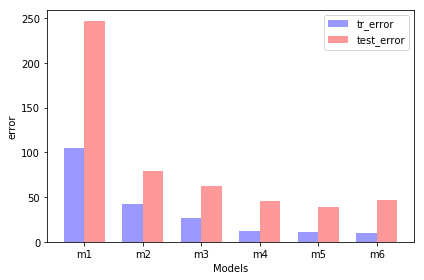

In [279]:

n_groups = len(train_test_error)

means_tr_er = []
means_te_er = []

for i in range(n_groups):
    means_tr_er.append(np.array(train_test_error[i+1]['tr_error']).mean())
    means_te_er.append(np.array(train_test_error[i+1]['te_error']).mean())

    


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_tr_er, bar_width,
                alpha=opacity, color='b',
                 error_kw=error_config,
                label='tr_error')

rects2 = ax.bar(index + bar_width, means_te_er, bar_width,
                alpha=opacity, color='r',
                 error_kw=error_config,
                label='test_error')

ax.set_xlabel('Models')
ax.set_ylabel('error')
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('m1', 'm2', 'm3', 'm4', 'm5','m6'))
ax.legend()

fig.tight_layout()
plt.show()

It seems that M5 is the best choice of model, since it has minimum Test error and train error.